# Análisis Exploratorio de Datos (EDA)

En este EDA, realizaremos un análisis exhaustivo de los datos, incluyendo la identificación de valores nulos, faltantes y outliers, para obtener un conocimiento más profundo de la información disponible.

## Estructura del Análisis

- **Tablas a analizar:**
  - **Tabla de Hechos**
  - **Tabla de Víctimas**

- **Análisis Gráfico:**
  - Utilizaremos gráficos para visualizar los datos y extraer información significativa.

- **Conclusiones:**
  - Presentaremos una conclusión final sobre la información obtenida y destacaremos los puntos más relevantes.

- **Propuesta de KPIs:**
  - Plantearemos y propondrán KPIs basados en el análisis realizado.

Este enfoque nos permitirá entender mejor los datos y establecer indicadores clave de rendimiento que guíen nuestras acciones futuras.


## iniciamos con la carga de librerias a utilizar y archivos.

In [1]:
# manipulacion de datos
import pandas as pd
# visualizacion de los datos
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tabla_hechos = pd.read_csv("Datasets_originales/hechos.csv")
tabla_victimas = pd.read_csv("Datasets_originales/victimas.csv")

## Funciones

## hacemos una vista de la estructura de las tablas 

In [3]:
tabla_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  XY (CA

In [4]:
tabla_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             717 non-null    object
 1   FECHA                717 non-null    object
 2   AAAA                 717 non-null    int64 
 3   MM                   717 non-null    int64 
 4   DD                   717 non-null    int64 
 5   ROL                  717 non-null    object
 6   VICTIMA              717 non-null    object
 7   SEXO                 717 non-null    object
 8   EDAD                 717 non-null    object
 9   FECHA_FALLECIMIENTO  717 non-null    object
dtypes: int64(3), object(7)
memory usage: 56.1+ KB


In [5]:
tabla_hechos.head(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,1/10/2016,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,1/21/2016,2016,1,21,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [6]:
tabla_victimas.head(5)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016
2,2016-0003,1/3/2016,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016
3,2016-0004,1/10/2016,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1/21/2016,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2/1/2016


### analisis de estructura de datos:
* la tabla de hechos tiene valores nulos en calle,altura,cruce y dirección normalizada
* la tabla de victimas no tiene nulos, hay que hacer una investigacion mas exsaustiva 
* la tabla lesiones tiene nulos en franja_hora,direccion_normalizada,comuna,tipo_calle,otra_direccion,calle,altura,cruce,geocodificacion_CABA,longitud y latitud

- Acciones a hacer:
    * como en la columna lugar de hecho ya tenemos el cruce y tambien tenemos la latitud y longitud con exactitud,vamos a borrar tipo de calle,altura,cruce,Direccion Normalizada,XY (CABA).
      ademas tenemos hora por la cual podemos borrar HH.
  
    * en la tabla victimas podemos pasar a DATETIME el formato de fecha. tambien tenemos fecha de fallecimiento,algunos son sin datos, por lo cual podriamos tomarlos que no morieron sino que sufrieron lesiones

## limpieza y normalizacion de las tablas y datos

### Tabla Hechos

* vamos a iniciar borrando columnas repetidas o que no vayamos a utilizar

In [7]:
tabla_hechos_normalizado = tabla_hechos.drop(columns=["Calle","Altura","Cruce","Dirección Normalizada","XY (CABA)"])

* convertimos la columna fecha a datetime y la columna hora_fija en int

In [8]:
tabla_hechos_normalizado["FECHA"] = pd.to_datetime(tabla_hechos_normalizado["FECHA"])

* ahora reenombramos las columnas a minusculas para tener mas comprensible la tabla, (pos x) y (pos y) van a ir como latitud y longitud

In [9]:
tabla_hechos_normalizado.columns = tabla_hechos_normalizado.columns.str.lower()
tabla_hechos_normalizado = tabla_hechos_normalizado.rename(columns={"aaaa":"año","mm":"mes","dd":"dia","hh":"hora_fija","pos x":"longitud","pos y":"latitud"})
tabla_hechos_normalizado

,id,n_victimas,fecha,año,mes,dia,hora,hora_fija,lugar_del_hecho,tipo_de_calle,comuna,longitud,latitud,participantes,victima,acusado
0,2016-0001,1,2016-01-01,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,7,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,1:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,9,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,0:43:00,0,AV. GAONA Y TERRADA,AVENIDA,11,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,9,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


* no va a hacer falta hacer busqueda de nulos ya que con la estructura de datos comprobamos que no tenia nulos pero si SD (sin dato), asi que vamos a visualizar cuantos sin datos hay

In [10]:
tabla_hechos_normalizado[tabla_hechos_normalizado["participantes"].str.contains("SD",case=False,na=False)]

,id,n_victimas,fecha,año,mes,dia,hora,hora_fija,lugar_del_hecho,tipo_de_calle,comuna,longitud,latitud,participantes,victima,acusado
3,2016-0004,1,2016-01-10,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
32,2016-0045,1,2016-04-11,2016,4,11,10:25:00,10,AV GRAL PAZ Y AV DEL LIBERTADOR,GRAL PAZ,13,-58.46743471,-34.53476874,MOTO-SD,MOTO,SD
35,2016-0049,1,2016-04-17,2016,4,17,0:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,4,-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,13,.,.,MOTO-SD,MOTO,SD
57,2016-0080,1,2016-06-18,2016,6,18,6:42:00,6,AV GRAL PAZ Y AV RIVADAVIA,GRAL PAZ,9,-58.52927982,-34.63931752,AUTO-SD,AUTO,SD
76,2016-0101,1,2016-08-07,2016,8,7,19:42:00,19,AV GRAL PAZ Y JORGE CHAVEZ,GRAL PAZ,9,-58.52932872,-34.65014993,SD-SD,SD,SD
83,2016-0110,1,2016-08-24,2016,8,24,20:21:00,20,AV ALBERDI Y CARHUE,AVENIDA,9,-58.51232237,-34.65903530,PEATON-SD,PEATON,SD
88,2016-0115,1,2016-09-02,2016,9,2,11:50:00,11,ARIAS Y TRONADOR,CALLE,12,-58.48935041,-34.54917673,SD-CARGAS,SD,CARGAS
92,2016-0119,1,2016-09-04,2016,9,4,6:40:00,6,CRISOLOGO LARRALDE Y AVDA TRIUNVIRATO,AVENIDA,12,-58.49659234,-34.56353635,SD-SD,SD,SD
105,2016-0135,1,2016-10-24,2016,10,24,5:00:00,5,AV FIGUEROA ALCORTA Y PINEDO,AVENIDA,14,-58.42260225,-34.56403694,PEATON-SD,PEATON,SD


* al hacer esta visualizacion nos damos cuenta que mas allá de que hay datos sin datos, tambien hay datos con solo un punto (.)  o sin dato en lugar de hechos donde estaria totalmente mal,en estos casos los que no tenga direccion en lugar de hechos y tampoco coordenadas en latitud y longitud para poder corregirlo, vamos a proceder a borrarlos.

pero antes vamos a verificar cuantas filas tienen punto (.) en las coordenadas

In [11]:
tabla_hechos_normalizado[tabla_hechos_normalizado["longitud"] == "."]

,id,n_victimas,fecha,año,mes,dia,hora,hora_fija,lugar_del_hecho,tipo_de_calle,comuna,longitud,latitud,participantes,victima,acusado
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,13,.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,0:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,4,.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,0,.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,0:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,0,.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,9:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,14,.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,9,.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,3:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,7,.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,4,.,.,MOTO-PASAJEROS,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,14,.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,6:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,14,.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


* a simple vista podemos ver que los lugares de hechos donde contienen punto solo 1 es una calle mientras que los otros son autopistas y AV de alto trafico. por lo cual vamos a destacar que los lugares de hechos donde contengan longitud y latitud en 0 van a ser autopistas y AV de gran trafico

- a tomar en cuenta:
    * en este caso solo 1 fila tiene para completar los datos de coordenadas que es MURGUIONDO 2700. vamos a reemplazarlo manualmente

In [12]:
tabla_hechos_normalizado.loc[559,"longitud"] = -58.493249
tabla_hechos_normalizado.loc[559,"latitud"] = -34.66337
tabla_hechos_normalizado[["latitud","longitud"]] = tabla_hechos_normalizado[["latitud","longitud"]].applymap(lambda x: 'null' if x == '.' else x)
tabla_hechos_normalizado.head(2)

C:\Users\MaxiJ\AppData\Local\Temp\ipykernel_15608\2425555821.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla_hechos_normalizado[["latitud","longitud"]] = tabla_hechos_normalizado[["latitud","longitud"]].applymap(lambda x: 'null' if x == '.' else x)


,id,n_victimas,fecha,año,mes,dia,hora,hora_fija,lugar_del_hecho,tipo_de_calle,comuna,longitud,latitud,participantes,victima,acusado
0,2016-0001,1,2016-01-01,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


* ahora si procedemos a borrar los que no tenemos coordenadas ni lugar de hechos

In [13]:
tabla_hechos_normalizado = tabla_hechos_normalizado[tabla_hechos_normalizado["lugar_del_hecho"] != "SD"].reset_index(drop=True)
tabla_hechos_normalizado

,id,n_victimas,fecha,año,mes,dia,hora,hora_fija,lugar_del_hecho,tipo_de_calle,comuna,longitud,latitud,participantes,victima,acusado
0,2016-0001,1,2016-01-01,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,7,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
691,2021-0094,1,2021-12-20,2021,12,20,1:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,9,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
692,2021-0095,1,2021-12-30,2021,12,30,0:43:00,0,AV. GAONA Y TERRADA,AVENIDA,11,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
693,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,9,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


* Ponemos en 0 a hora y hora_fija y convertimos en int a hora fija

In [14]:
hora_sin_dato = tabla_hechos_normalizado[tabla_hechos_normalizado["hora_fija"] == "SD"].index
tabla_hechos_normalizado.loc[hora_sin_dato] = tabla_hechos_normalizado.loc[hora_sin_dato].replace('SD', '0')
tabla_hechos_normalizado["hora_fija"] = tabla_hechos_normalizado["hora_fija"].astype(int)

* bien ahora tenemos la tabla limpio de nulos y datos faltantes como punto (.) pero dejamos los faltantes de SD-SD ya que vamos a usarlos en las graficas porque aunque no tengamos datos sobre ellos, se los considera accidente pero no se sabe si hubo muertos,lesionados o algun otro caso de lesión

### Tabla Victimas

* iniciamos viendo la lista y podemos ver que en fecha de fallecimiento hay sin dato (SD), por lo cual según el Observatorio de Movilidad y Seguridad Vial de la Ciudad de
Buenos Aires (OMSV) se los puede considerar como lesiones leves

In [15]:
tabla_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016
2,2016-0003,1/3/2016,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016
3,2016-0004,1/10/2016,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1/21/2016,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2/1/2016
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,12/12/2021,2021,12,12,PEATON,PEATON,FEMENINO,50,12/12/2021
713,2021-0093,12/13/2021,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,12/18/2021
714,2021-0094,12/20/2021,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,12/20/2021
715,2021-0095,12/30/2021,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,1/2/2022


* normalizamos fecha y fecha_fallecimiento convirtiendolos en datetime, y renombramos AAAA,MM,DD

In [16]:
tabla_victimas["FECHA"] = pd.to_datetime(tabla_victimas["FECHA"])
tabla_victimas["FECHA_FALLECIMIENTO"] = pd.to_datetime(tabla_victimas["FECHA_FALLECIMIENTO"],errors="coerce")
tabla_victimas = tabla_victimas.rename(columns={"AAAA":"año","MM":"mes","DD":"dia"})

* ahora vamos a chequear si hay duplicados

In [17]:
tabla_victimas[tabla_victimas.duplicated(subset="ID_hecho",keep=False)]

,ID_hecho,FECHA,año,mes,dia,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
29,2016-0041,2016-03-29,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54,2016-03-29
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30
98,2016-0126,2016-09-18,2016,9,18,CONDUCTOR,AUTO,MASCULINO,37,NaT
99,2016-0126,2016-09-18,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,NaT
163,2017-0026,2017-02-26,2017,2,26,PASAJERO_ACOMPAÑANTE,AUTO,FEMENINO,23,2017-02-26
164,2017-0026,2017-02-26,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19,2017-02-26
173,2017-0035,2017-03-23,2017,3,23,CONDUCTOR,AUTO,MASCULINO,28,2017-03-23
174,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,2017-03-23
175,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,2017-03-23
176,2017-0036,2017-03-29,2017,3,29,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,SD,2017-03-29


* como se puede ver, se repiten los Hechos, pero si llamamos a id_hecho duplicado, podremos ver que no es el mismo dato duplicado ya que son individualmente la persona que sufrio el accidente, podria ser el acompañante o conductor de una moto o auto, o algun peaton cruzando la calle, o tambien algun pasajero en el transporte publico 

In [18]:
tabla_victimas[tabla_victimas["ID_hecho"] == "2017-0153"]

,ID_hecho,FECHA,año,mes,dia,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
277,2017-0153,2017-12-11,2017,12,11,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2017-12-12
278,2017-0153,2017-12-11,2017,12,11,CONDUCTOR,MOTO,MASCULINO,30,2017-12-12


* por la estructura vimos que no tiene nulos pero si sin datos (SD), a lo que vamos a ver cuantos por cada columna que los tenga

In [19]:
tabla_victimas[tabla_victimas["EDAD"] == "SD"]

,ID_hecho,FECHA,año,mes,dia,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,NaT
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,NaT
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,SD,NaT
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,SD,SD,NaT
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,SD,NaT
63,2016-0085,2016-06-29,2016,6,29,SD,MOTO,MASCULINO,SD,NaT
72,2016-0096,2016-07-25,2016,7,25,CONDUCTOR,MOTO,MASCULINO,SD,NaT
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,SD,NaT
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,SD,FEMENINO,SD,NaT


* hacemos un conteo de SD y tenemos en cada columna lo siguiente:
    * ROL: 11
    * VICTIMA: 9
    * SEXO: 6
    * EDAD: 53
    * FECHA_FALLECIMIENTO: 68

* en la anterior vista de la tabla podemos ver que hay SD en la misma fila de las columnas mencionadas anteriormente, a esas filas las vamos a borrar, al igual los que de las columnas mencionadas solamente tengan un dato , ya que no nos sirve mucho que solo tenga un dato, porque por mas que nos aporte un dato, no nos da la certeza en las estadisticas.lo vamos a hacer manual

* tambien cambiamos la edad a 0 ya que aunque tengamos algunos datos faltantes, nos siguen sirviendo para las graficas

In [20]:
tabla_victimas.drop([36,39,89,141],inplace=True)
tabla_victimas["EDAD"] = tabla_victimas["EDAD"].replace("SD", '0').astype(int)
tabla_victimas = tabla_victimas.reset_index(drop=True)

* ahora vamos a poner en minisculas las columnas de la tabla victimas y renombrar año,mes y dia

In [21]:
tabla_victimas.columns = tabla_victimas.columns.str.lower()
tabla_victimas

,id_hecho,fecha,año,mes,dia,rol,victima,sexo,edad,fecha_fallecimiento
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,NaT
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01
...,...,...,...,...,...,...,...,...,...,...
708,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12
709,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18
710,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20
711,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02


* bueno terminado la limpieza de cierta parte de datos y normalizacion, sabemos que hay valores 0 en edad y valores sin dato(SD) en algunas columnas, pero no se las eliminó ya que se podria considerar datos importantes por mas minimo que aporte

## Visualizacion con graficos

* Accidentes por año

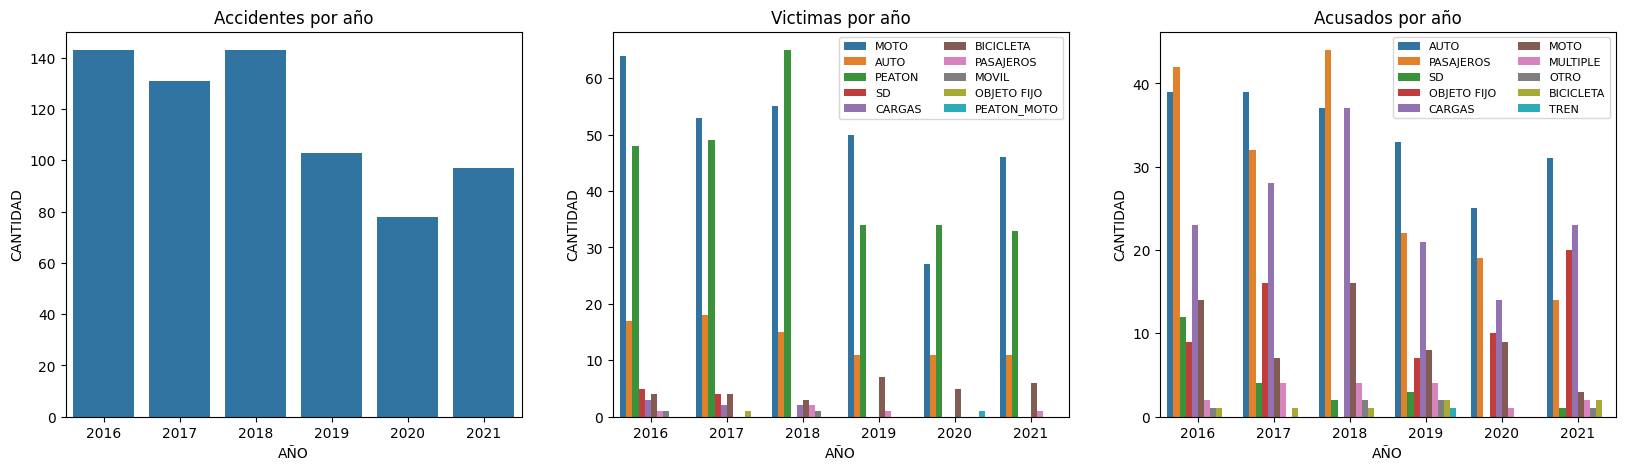

In [22]:
figure,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))

sns.countplot(data=tabla_hechos_normalizado,x="año",ax=ax1)
ax1.set_title("Accidentes por año")
ax1.set_xlabel("AÑO")
ax1.set_ylabel("CANTIDAD")

sns.countplot(data=tabla_hechos_normalizado,x="año",hue="victima",ax=ax2)
ax2.legend(loc = "best",fontsize = 8,ncol = 2)
ax2.set_title("Victimas por año")
ax2.set_xlabel("AÑO")
ax2.set_ylabel("CANTIDAD")

sns.countplot(data=tabla_hechos_normalizado,x="año",hue="acusado",ax=ax3)
ax3.legend(loc = "best",fontsize = 8,ncol = 2)
ax3.set_title("Acusados por año")
ax3.set_xlabel("AÑO")
ax3.set_ylabel("CANTIDAD")


plt.show()

En este análisis se presentan tres gráficas:

1. **Gráfica General de Accidentes por Año**
2. **Gráfica de Víctimas por Año**
3. **Gráfica de Causantes de Accidentes por Año**

### Gráfica General de Accidentes por Año

Con esta gráfica, podemos observar que:

- **La mayoría de los accidentes ocurrieron entre 2016 y 2018.**
- **A partir de 2019, se redujo la actividad de accidentes en un 30%.**
- **En 2020 fue el comienzo de la pandemia hasta mitad del mismo año, por la cual hubo poca actividad en las calles**

### Gráfica de Víctimas por Año

En esta gráfica, se muestra qué víctimas sufrieron accidentes. Visualmente, se puede ver que:

- **Las motos y los peatones son los que sufren más accidentes.**
- **Los autos no superan los 20 accidentes por año.**

### Gráfica de Causantes de Accidentes por Año

En cuanto a los causantes de los accidentes, podemos destacar que:

- **Los autos, los pasajeros que ascendían o descendían de vehículos y los vehículos de carga son los principales causantes.**
- **De 2019 a 2021, hubo un aumento en los accidentes contra objetos fijos.**
- **De 2017 a 2020, se redujo la cantidad de accidentes causados por autos.**

# Accidentes por mes

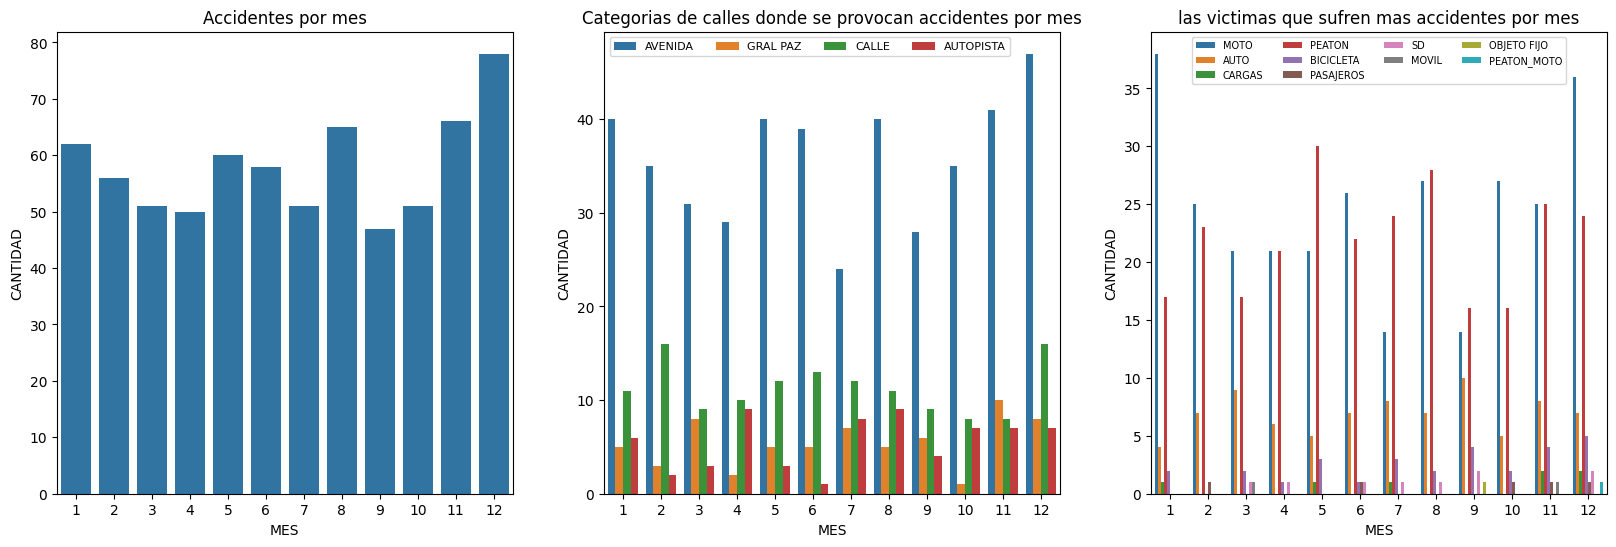

In [23]:
fig,(ax4,ax5,ax6) = plt.subplots(1,3,figsize =(20,6))

sns.countplot(data=tabla_hechos_normalizado, x="mes",ax=ax4)
ax4.set_title("Accidentes por mes")
ax4.set_xlabel("MES")
ax4.set_ylabel("CANTIDAD")

sns.countplot(data=tabla_hechos_normalizado,x="mes",hue="tipo_de_calle",ax=ax5)
ax5.set_title("Categorias de calles donde se provocan accidentes por mes")
ax5.legend(loc = "upper left",fontsize = 8,ncol = 4)
ax5.set_xlabel("MES")
ax5.set_ylabel("CANTIDAD")

sns.countplot(data=tabla_hechos_normalizado,x="mes",hue="victima",ax=ax6)
ax6.legend(loc = "best",fontsize = 7,ncol = 4)
ax6.set_title("las victimas que sufren mas accidentes por mes")
ax6.set_xlabel("MES")
ax6.set_ylabel("CANTIDAD")

plt.show()

En este análisis se presentan tres tablas:

1. **Accidentes por Mes**
2. **Categorías de Calles con Accidentes por Mes**
3. **Víctimas de Accidentes por Mes**

### Tabla de Accidentes por Mes

En la primera Gráfica, podemos observar que:

- **La mayoría de los accidentes ocurren en el mes 12 (diciembre).**
- **Otros meses con alta incidencia de accidentes son el 1 (enero), el 8 (agosto) y el 11 (noviembre).**

Algunos factores que contribuyen a estos picos son:

- **Días festivos en diciembre y enero.**
- **El regreso de las vacaciones de invierno en agosto.**

### Tabla de Categorías de Calles con Accidentes por Mes

En la segunda Gráfica, se analiza dónde se producen los accidentes según la categoría de las calles. Observamos que:

- **Las avenidas son las que registran la mayoría de los accidentes.**
- **Hay un pico notable en diciembre, coincidiendo con los días festivos.**

### Tabla de Víctimas de Accidentes por Mes

En la tercera Gráfica, se examina quiénes son las víctimas de los accidentes. Los puntos clave son:

- **Las motos y los peatones son los más afectados.**
- **Se repite el patrón de que motos y peatones son los más accidentados tanto por año como por mes.**


# Graficas variadas

### datos de generos accidentados

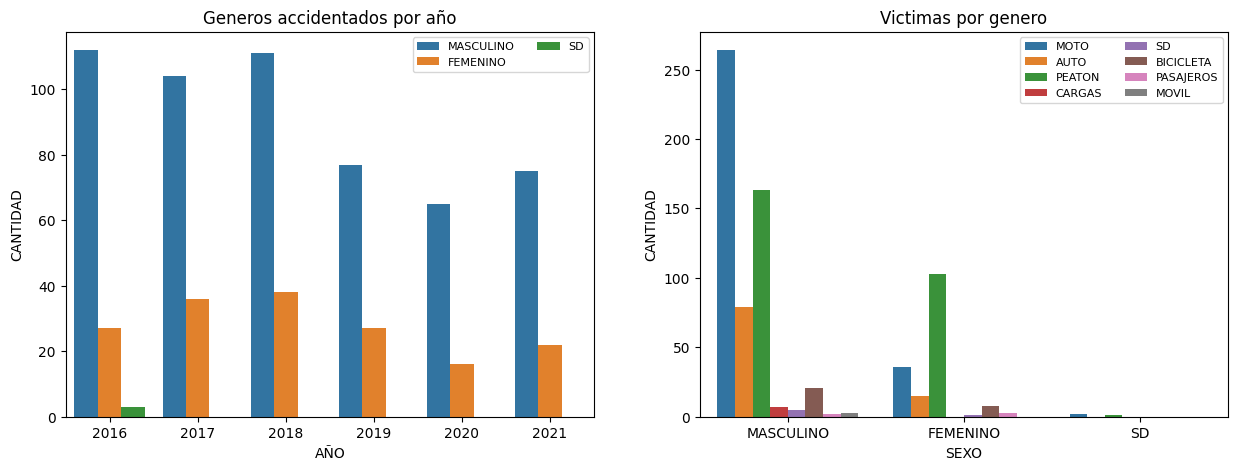

In [24]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,5))
sns.countplot(data=tabla_victimas,x="año",hue="sexo",ax=ax1)
ax1.legend(loc = "best",fontsize = 8,ncol = 2)
ax1.set_title("Generos accidentados por año")
ax1.set_xlabel("AÑO")
ax1.set_ylabel("CANTIDAD")

sns.countplot(data=tabla_victimas,x="sexo",hue="victima",ax=ax2)
ax2.legend(loc = "best",fontsize = 8,ncol = 2)
ax2.set_title("Victimas por genero")
ax2.set_xlabel("SEXO")
ax2.set_ylabel("CANTIDAD")

plt.show()

### Análisis de Accidentes por Género

En este análisis, se presentan dos gráficos:

1. **Gráfico de Accidentes por Género a lo Largo de los Años**
2. **Gráfico de Tipos de Víctimas por Género**

#### Gráfico de Accidentes por Género a lo Largo de los Años

- **El género masculino es el que sufrió más accidentes durante todos los años.**
- **El género femenino tiene una incidencia de accidentes significativamente menor.**

#### Gráfico de Tipos de Víctimas por Género

- **Los hombres que usan moto y son peatones son los más accidentados.**
- **Los hombres tienen una baja incidencia de accidentes en auto.**
- **Las mujeres son mayormente peatones entre las víctimas de accidentes.**


### edad de accidentados

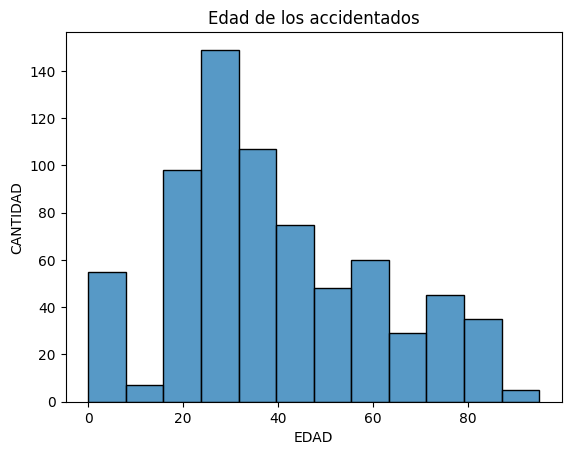

In [25]:
sns.histplot(data=tabla_victimas,x="edad",bins=12)
# plt.legend(loc = "best",fontsize = 8,ncol = 1)
plt.title("Edad de los accidentados")
plt.xlabel("EDAD")
plt.ylabel("CANTIDAD")
plt.show()

### Análisis de Accidentes por Edad

En el análisis de este gráfico, observamos que:

- **El rango de edad entre 18 y 40 años es el más accidentado en todos los años.**
- **Los registros con edad 0 se clasifican como "Sin dato".**
  - No se consideran outliers, ya que hay conocimiento de que estas personas sufrieron un accidente.

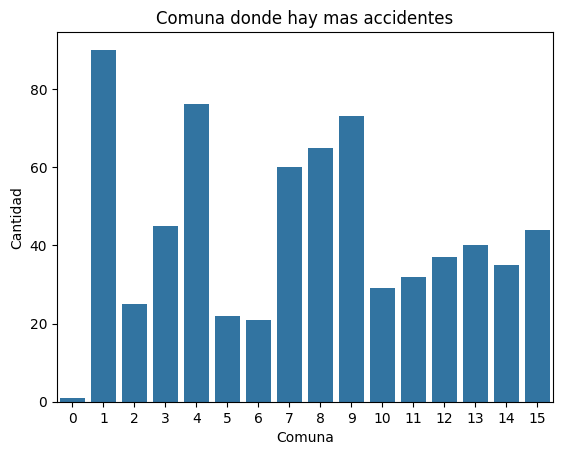

In [26]:
sns.countplot(data=tabla_hechos_normalizado,x="comuna")
plt.title("Comuna donde hay mas accidentes")
plt.xlabel("Comuna")
plt.ylabel("Cantidad")
plt.show()

### Análisis de Accidentes por Comuna

En este análisis, observamos en qué comunas hay más accidentes en general:

- **La comuna 1 (Retiro, Monserrat, San Nicolás, Constitución, San Telmo, Puerto Madero) es la más accidentada.**
- **Le sigue la comuna 4 (Nueva Pompeya, Parque Patricios, Barracas, La Boca).**
- **La comuna 9 (Liniers, Mataderos, Parque Avellaneda) también presenta un alto número de accidentes.**

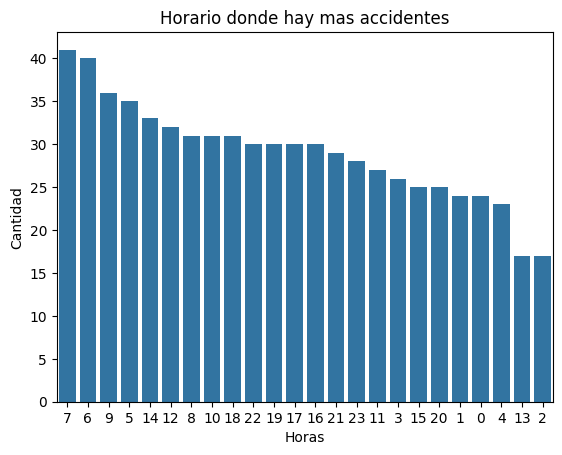

In [27]:
orden_horario=tabla_hechos_normalizado.value_counts(subset="hora_fija",ascending=False).index
sns.countplot(data=tabla_hechos_normalizado,x="hora_fija",order=orden_horario)
plt.title("Horario donde hay mas accidentes")
plt.xlabel("Horas")
plt.ylabel("Cantidad")
plt.show()

# Conclusiones Finales

En base al análisis realizado, podemos concluir lo siguiente:

- **Entre los años 2016 y 2018 se registró la mayor frecuencia de accidentes.**
  - **En 2019, los accidentes se redujeron en un 30%, y en 2020 disminuyeron aproximadamente un 10% más debido a la pandemia.**

- **El género masculino es el más afectado por los accidentes, principalmente en motos y como peatones.**
  - **Las mujeres tienen menos accidentes y, cuando ocurren, suelen ser como peatones.**

- **Los meses de diciembre y enero presentan el mayor número de accidentes, coincidiendo con los días festivos.**

- **Las avenidas son los lugares donde se cometen la mayoría de los accidentes.**

- **Las motos son, en general, los vehículos más accidentados, junto a los peatones.**

- **La franja de edad más afectada es entre los 18 y 40 años.**

- **Los horarios con más accidentes son entre las 5 y las 9 de la mañana.**

- **Las comunas 1, 4 y 9 son las áreas con mayor cantidad de accidentes.**

- **Los vehículos que más provocan accidentes son los autos, los pasajeros al ascender o descender de un vehículo, y los camiones de carga.**

---

# Exportamos los archivos normalizados

In [28]:
tabla_hechos_normalizado.to_csv("Datasets_finales/hechos.csv")
tabla_victimas.to_csv("Datasets_finales/victimas.csv")

### KPI 1: Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

* Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo
    específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000
* investigando sabemos que hay un aproximado de 3.121.707 habitantes en CABA (Censo 2022).

In [29]:
Total_poblacion_CABA = 3121707
# guardamos la ultima fecha la cual es la mas reciente
final_semestre = tabla_victimas["fecha"].max()

# ahora vamos sacar el inicio del semestre, que seria 6 meses antes
inicio_semestre = final_semestre - pd.DateOffset(months=6)

# ahora vamos a hacer lo mismo pero para sacar el semestre anterior
final_semestre_anterior = inicio_semestre - pd.DateOffset(days=1)
inicio_semestre_anterior = final_semestre_anterior - pd.DateOffset(months=6)

#accidentes por semestre
accidentes_semestre = tabla_victimas[(tabla_victimas["fecha"] >= inicio_semestre) & (tabla_victimas["fecha"] <= final_semestre)]
accidentes_semestre_anterior = tabla_victimas[(tabla_victimas["fecha"] >= inicio_semestre_anterior) & (tabla_victimas["fecha"] <= final_semestre_anterior)]

#conteo de accidentes por semestre
cant_accidentes_semestre = len(accidentes_semestre)
cant_accidentes_semestre_anterior = len(accidentes_semestre_anterior)

# calculamos la tasa de homicidios por semestre
tasa_de_homicidios_semestre = (cant_accidentes_semestre/Total_poblacion_CABA) * 100000
tasa_de_homicidios_semestre_anterior = (cant_accidentes_semestre_anterior/Total_poblacion_CABA) * 100000

# calculamos la tasa porcentual de homicidios
tasa_porcentual_homicidios = round((tasa_de_homicidios_semestre - tasa_de_homicidios_semestre_anterior) / (tasa_de_homicidios_semestre_anterior) * 100,2)


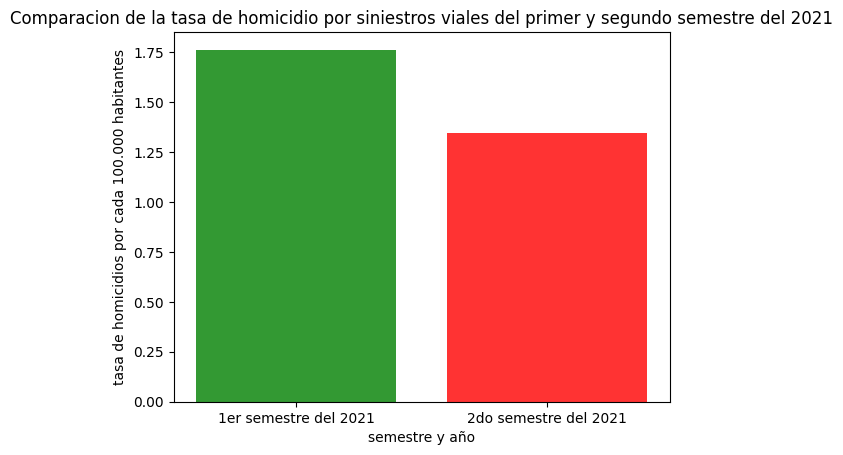

In [30]:
plt.bar(["1er semestre del 2021","2do semestre del 2021"],[tasa_de_homicidios_semestre_anterior,tasa_de_homicidios_semestre],color=["green","red"],alpha=0.8)
plt.title("Comparacion de la tasa de homicidio por siniestros viales del primer y segundo semestre del 2021")
plt.xlabel("semestre y año")
plt.ylabel("tasa de homicidios por cada 100.000 habitantes")
plt.show()

### vamos a hacer una demostracion de los valores de los datos que obtuvimos
- periodos de semestres:
    * el primer semestre arrancó el 29-12-2020 y terminó el 29-06-2021
    * el segundo semestre arrancó el 30-06-2021 y terminó el 30-12-2021
- la cantidad de homicidios por semestre fue:
    * 1er Semestre: 55 muertes
    * 2do Semestre: 42 muertes
- la tasa de homicidios por cada semestre fue:
    * 1er Semestre: 1.76 % por cada 100.000 habitantes
    * 2do Semestre: 1.34 % por cada 100.000 habitantes
- la taza porcentual entre el primer y segundo semestre es:
    * porcentual entre 1er y 2do semestre es -23,64%

* el objetivo era reducir un 10% la tasa de homicidios en accidentes viales en comparacion con el actual y anterior semestre, y finalmente **se logró el objetivo**.

### KPI 2: Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

* Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número   de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

In [31]:
# hacemos el filtrado por año
año_actual = tabla_victimas[tabla_victimas["año"] == 2021]
año_anterior = tabla_victimas[tabla_victimas["año"] == 2020]

conteo_año_actual = año_actual["victima"].str.contains("MOTO",case=False).sum()
conteo_año_anterior = año_anterior["victima"].str.contains("MOTO",case=False).sum()

evolucion_moto = (conteo_año_actual - conteo_año_anterior)/(conteo_año_anterior) * 100

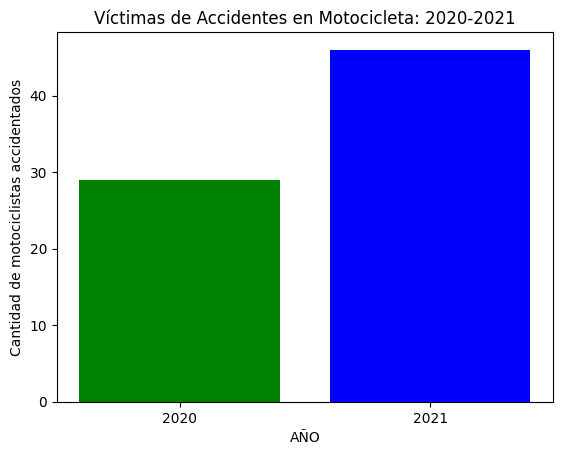

In [32]:
plt.bar(["2020","2021"],[conteo_año_anterior,conteo_año_actual],color = ["green","blue"])
plt.title("Víctimas de Accidentes en Motocicleta: 2020-2021")
plt.xlabel("AÑO")
plt.ylabel("Cantidad de motociclistas accidentados")
plt.show()

### Analisis del KPI 2
- Datos obtenidos:
    * la cantidad de motociclistas en el 2020 fue de 29 accidentados.
    * la cantidad de motociclistas en el 2021 fue de 46 accidentados.
- porcentualmente incrementó un 58,62% de victimas motociclistas entre 2020 y 2021

- el objetivo era reducir un 7% la cantidad de victimas motociclistas entre el periodo del 2020 y 2021 y hizo lo contrario, aumento un 58,62% por lo cual **fallo en su objetivo**

**Recomendaciones de Seguridad Vial para Motociclistas**

Es esencial seguir estas recomendaciones para reducir la incidencia de accidentes entre los motociclistas:

- Respetar los semáforos y señales de tráfico.
- Evitar conducir bajo la influencia del alcohol o sustancias que afecten la capacidad de conducción.
- Utilizar siempre el equipo de seguridad adecuado, como casco, chaqueta con protecciones, guantes y botas.
- Mantener una distancia segura con otros vehículos y estar atento a posibles obstáculos en la vía.
- Circular a una velocidad adecuada y adaptada a las condiciones del tráfico y del clima.
- Realizar un mantenimiento regular de la motocicleta, asegurándose de que los frenos, neumáticos, luces y señales estén en buen estado.
- Tomar cursos de conducción defensiva y técnicas de manejo seguro específicamente diseñados para motociclistas.
- Participar en campañas educativas sobre seguridad vial para motociclistas.

Además de estas medidas, se sugiere promover el desarrollo de infraestructuras viales más seguras para motociclistas, como la creación de carriles exclusivos para motos y la implementación de medidas de seguridad activa y pasiva en las vías.

Estas recomendaciones son fundamentales para promover una conducción segura entre los motociclistas y reducir la cantidad de accidentes en nuestras vías.


### KPI 3: Reducir en un 10% la cantidad de accidentes ocurridos durante las mañanas, específicamente en el horario de 5 a 9 am del último año, respecto al año anterior, en CABA, dividiendo los resultados por trimestres.
* comparamos entre el primer trimestre y el ultimo del 2021 para ver si hubo una mejora en la reduccion de accidentes entre el rango horario de las 5 a 9 am. calculamos la diferencia trimestral con la siguiente formula (ultimo_trimestre - primer_trimestre) / (primer_trimestre) * 100

In [33]:

# filtramos por el rango horario que vamos a utilizar, y sacamos la ultima fecha en la tabla
tabla_filtrada_por_hora = tabla_hechos_normalizado[(tabla_hechos_normalizado["hora_fija"] >= 5) & (tabla_hechos_normalizado["hora_fija"] <= 9)]

#empezamos a dividir por cuatrimestres
final_4to_trimestre = tabla_hechos_normalizado["fecha"].max()
inicio_4to_trimestre = final_4to_trimestre - pd.DateOffset(months=3)
# tercer cuatrimestre
final_3to_trimestre = inicio_4to_trimestre
inicio_3to_trimestre = final_3to_trimestre - pd.DateOffset(months=3)
#segundo cuatrimestre
final_2to_trimestre = inicio_3to_trimestre
inicio_2to_trimestre = final_2to_trimestre - pd.DateOffset(months=3)
#primer cuatrimestre
final_1to_trimestre = inicio_2to_trimestre
inicio_1to_trimestre = final_1to_trimestre - pd.DateOffset(months=3)

# filtramos los cuatrimestres por los horarios que vamos a usar
primer_trimestre = tabla_filtrada_por_hora[(tabla_filtrada_por_hora["fecha"] >= inicio_1to_trimestre) & (tabla_filtrada_por_hora["fecha"] <= final_1to_trimestre)]
segundo_trimestre = tabla_filtrada_por_hora[(tabla_filtrada_por_hora["fecha"] >= inicio_2to_trimestre) & (tabla_filtrada_por_hora["fecha"] <= final_2to_trimestre)]
tercer_trimestre = tabla_filtrada_por_hora[(tabla_filtrada_por_hora["fecha"] >= inicio_3to_trimestre) & (tabla_filtrada_por_hora["fecha"] <= final_3to_trimestre)]
cuarto_trimestre = tabla_filtrada_por_hora[(tabla_filtrada_por_hora["fecha"] >= inicio_4to_trimestre) & (tabla_filtrada_por_hora["fecha"] <= final_4to_trimestre)]

# hacemos un conteo de los accidentes por cuatrimestre
conteo_primer_trimestre = len(primer_trimestre)
conteo_segundo_trimestre = len(segundo_trimestre)
conteo_tercer_trimestre = len(tercer_trimestre)
conteo_cuarto_trimestre = len(cuarto_trimestre)

#calculamos la diferencia entre el primer y ultimo cuatrimestre del año
porcentaje_diferencia = (conteo_cuarto_trimestre - conteo_primer_trimestre) / (conteo_primer_trimestre) * 100 

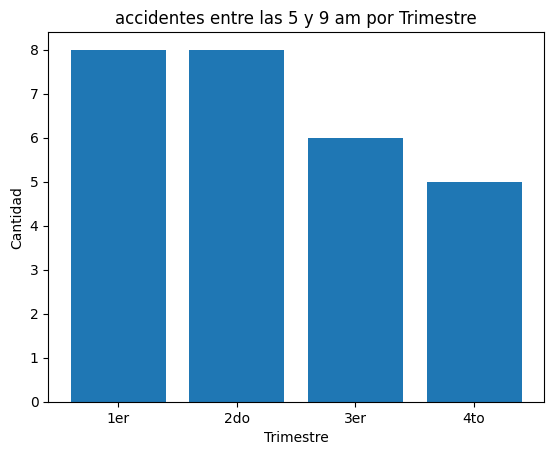

In [34]:
plt.bar(["1er","2do","3er","4to"],[conteo_primer_trimestre,conteo_segundo_trimestre,conteo_tercer_trimestre,conteo_cuarto_trimestre])
plt.title("accidentes entre las 5 y 9 am por Trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Cantidad")
plt.show()

# llegando a las conclusiones del Tercer KPI: 
- La mayoría de los accidentes ocurren durante el primer y segundo trimestre del año, coincidiendo con la vuelta de vacaciones, el regreso a la escuela y al trabajo. 
- El objetivo era reducir en un 10% los accidentes en el rango horario de 5 a 9 de la mañana, analizado por cuatrimestres. Se logró una reducción del 37.5%, superando significativamente la meta propuesta.
- Para seguir disminuyendo los accidentes, se recomienda:
  - Conducir siempre con precaución y respetar las leyes de tránsito.
  - Implementar puestos de control de alcoholemia al inicio del primer cuatrimestre.
